In [1]:
import pandas as pd #to check dataframe we can read a csv file in terms of rows and columns
#using dataframes
df = pd.read_csv('FIFA23_official_data.csv')
#df.shape #it is a property not a method
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


In [ ]:
df.values #array values of all the data elements, array of diff players in it

In [ ]:
df.describe() #gives mean,std,max min, all these datas 

In [7]:
df1= pd.DataFrame(df,columns=['Name','Wage','Value']) #to view the values in respective columns
df1["Value"] = df1["Value"].replace("[\€,]", "", regex=True)
df1["Wage"] = df1["Wage"].replace("[€]", "", regex=True)
df1["Value"]=pd.to_numeric(df1['Value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval))
df1["Wage"]=pd.to_numeric(df1['Wage'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval))
df1["Diff"]=df1["Value"]-df1['Wage']
df1=df1.sort_values(by=["Diff"],ascending=False)

df1

,Name,Wage,Value,Diff
75,K. Mbappé,230000.0,190500000.0,190270000.0
180,E. Haaland,220000.0,148000000.0,147780000.0
17,F. de Jong,230000.0,116500000.0,116270000.0
214,Pedri,115000.0,116000000.0,115885000.0
25,M. Salah,270000.0,115500000.0,115230000.0
...,...,...,...,...
8455,14 Índio,20000.0,0.0,-20000.0
2031,14 J. Zanetti,45000.0,1000.0,-44000.0
199,R. Kent,45000.0,0.0,-45000.0
1287,14 R. Giggs,60000.0,1000.0,-59000.0


In [ ]:
import seaborn as sns
sns.set_theme()
g=sns.scatterplot(x='Wage',y='Value',data=df1)
g

<AxesSubplot:xlabel='Diff', ylabel='Density'>

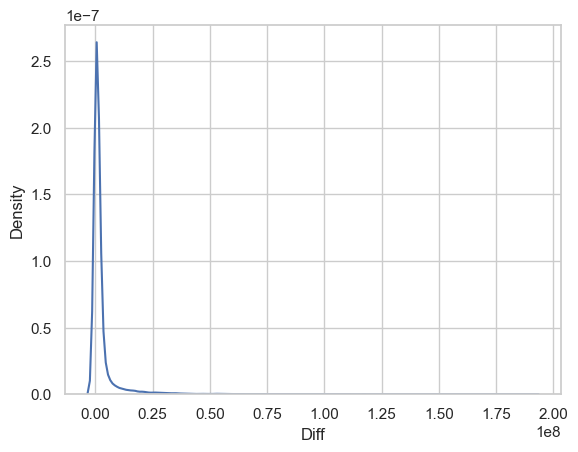

In [14]:
import seaborn as sns; sns.set_theme(style="whitegrid")
sns.kdeplot(data=df1, x="Diff")
sns.rugplot(data=df1, x="Diff")

In [ ]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name"),
])


p=figure(title='Soccer 2023',x_axis_label='Wage',y_axis_label='Value',plot_width=700,plot_height=700,tools=[TOOLTIPS])
p.circle('Wage','Value',size=10, source=df1)
show(p)